# PLAYSTORE DATA  

# NAME :  SOHEL PAWAR

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
sp = pd.read_csv("C:/Python_P/playstore-analysis.csv")

In [5]:
sp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


## 1.Data clean up – Missing value treatment
## a. Drop records where rating is missing since rating is our target/study variable

In [7]:
sp.dropna(subset=['Rating'], inplace=True)

In [8]:
sp ['Rating'].isnull().sum()

0

# b. Check the null values for the Android Ver column.
## i. Are all 3 records having the same problem?
## ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [9]:
sp[sp['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
sp int(input("enter a number:")) 

SyntaxError: invalid syntax (<ipython-input-10-7c9e89ecb17c>, line 1)

In [11]:
sp.drop(10472, axis=0, inplace=True )

In [12]:
sp[sp['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


### iii. Replace remaining missing values with the mode

In [13]:
sp['Android Ver'].mode()[0]

'4.1 and up'

In [14]:
sp['Android Ver']=sp['Android Ver'].fillna(sp['Android Ver'].mode()[0], inplace=True)

In [15]:

.0
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.sp.isna().sum()

SyntaxError: invalid syntax (<ipython-input-15-6b18134989a2>, line 2)

##  2. Data clean up – correcting the data types
### a. Which all variables need to be brought to numeric types?

In [16]:
sp.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Installs, Reviews and Price must be numeric

## b. Price variable – remove dollar sign and convert to ﬂoat.

In [17]:
price=[]
for i in sp['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)
        

In [18]:
sp['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    0
Name: Price, Length: 9366, dtype: object

## c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [19]:
sp['Installs']=sp['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

<ipython-input-19-24dbf4548ab0>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp['Installs']=sp['Installs'].str.replace('+', '').str.replace(',', '').astype(int)


In [20]:
sp


















['Price']

['Price']


## d. Convert all other identified columns to numeric

In [21]:
sp.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### So now we have to convert Reviews to numeric

In [22]:
sp['Reviews']=sp['Reviews'].astype(int)

In [23]:
sp.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# 3. Sanity checks – check for the following and handle accordingly
## a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
## i. Are there any such records? Drop if so.

In [24]:
sp[(sp['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### There are no such records to drop

## b. Reviews should not be more than installs as only those who installed can review the app.
## i. Are there any such records? Drop if so.

In [25]:
sp[sp.Reviews>sp.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,None
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,$2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,None
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,None
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0,Everyone,Arcade,"July 23, 2018",1.0,None
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0,Everyone,Arcade,"March 11, 2017",0.1,None
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0,Teen,Social,"July 23, 2018",1.0,None
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,None


In [26]:
index=sp[sp.Reviews>sp.Installs].index
sp.drop(labels=index, inplace=True)

In [27]:
sp[sp.Reviews>sp.Installs]         

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## Identity and Handle Outliers


## 1) price coloumn


TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

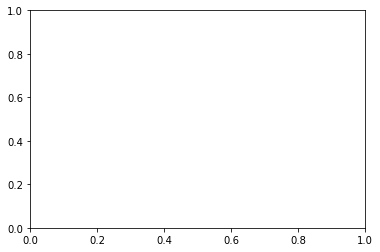

In [29]:
plt.boxplot(sp['Price'])
plt.show()

In [30]:
sp.loc[sp['Price']>200]

TypeError: '>' not supported between instances of 'str' and 'int'

In [31]:
sp.drop(sp[sp.Price>30].index, inplace=True)

TypeError: '>' not supported between instances of 'str' and 'int'

In [32]:
Percentile = sp.Installs.quantile(0.95)

In [33]:
print(Percentile)

100000000.0


In [32]:
sp[sp.Installs>1000000.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,None
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20000.000000,10000000,Free,0,Teen,Art & Design,"April 2, 2018",3.8,None
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39000.000000,5000000,Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,None
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31000.000000,10000000,Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10740,PhotoFunia,PHOTOGRAPHY,4.3,316378,4400.000000,10000000,Free,0,Everyone,Photography,"June 3, 2017",4.0.7.0,None
10781,Modern Strike Online,GAME,4.3,834117,44000.000000,10000000,Free,0,Teen,Action,"July 30, 2018",1.25.4,None
10784,Big Hunter,GAME,4.3,245455,84000.000000,10000000,Free,0,Everyone 10+,Action,"May 31, 2018",2.8.6,None
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,21516.529524,5000000,Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,None


In [33]:
sp.drop(sp[sp.Installs>1000000.0].index, inplace=True)

In [34]:
sp[sp.Installs>1000000.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Data analysis to answer business questions
 
 ## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?¶
 
## a. How do you explain this?

Skewness is -1.5653935182550458
('The median and mean is ', 4.2, 4.138417905871533)


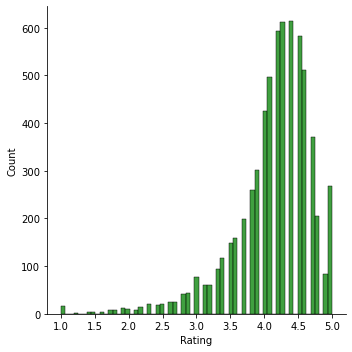

In [49]:
sn.displot(sp['Rating'], color='Green')
print('Skewness is',(sp['Rating']).skew())
print(('The median and mean is ', sp['Rating'].median(), sp['Rating'].mean()))

## Skewness is -1.5691083719913386 and the Mean and Median is greater than the Mode



## Positive Skewness means when the tail on right side of the distribution is longer or fatter.

## b. What is the implication of this on your analysis?


## This shape indicates that most of data points, outliers, that are greater than the mode and most data falls to the right, of the graph's peak.¶

## 6. What are the top Content Rating values?¶


## a). Are there any values with very few records?


In [36]:
sp['Content Rating'].value_counts()

Everyone           5370
Teen                626
Mature 17+          314
Everyone 10+        213
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

## 2 values are having very few records


## b. If yes, drop those as they won’t help in the analysis

In [37]:
R=sp[(sp['Content Rating']=='Adults only 18+') | (sp['Content Rating']=='Unrated')]
sp.drop(R.index, inplace=True)

In [38]:
sp['Content Rating'].value_counts()

Everyone        5370
Teen             626
Mature 17+       314
Everyone 10+     213
Name: Content Rating, dtype: int64

## 7. Effect of size on rating

## a. Make a joinplot to understand the effect of size on rating¶

## b. Do you see any patterns?

## c. How do you explain the pattern?

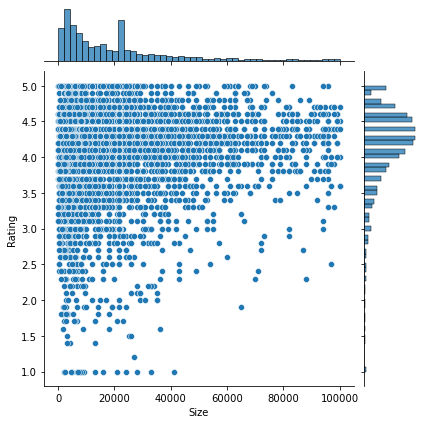

In [39]:
sn.jointplot(data=sp, x='Size',y='Rating',kind="scatter")

## Here the shape of map incresing so the ratings are also incresing  

## 8. Effect of price on rating

## a. Make a jointplot (with regression line)

## b. What pattern do you see?¶

## c. How do you explain the pattern?

## d. Replot the data, this time with only records with price > 0

## e. Does the pattern change?¶

## f. What is your overall inference on the effect of price on the rating

In [ ]:
sn.jointplot(data=sp, x='Price',y='Rating', kind="reg") 

In [ ]:
PR = sp[sp.Price>0]

In [ ]:
sn.jointplot(data=PR, x='Price',y='Rating', kind="reg")

## 9. Look at all the numeric interactions together –¶


## a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

In [ ]:
P = sp[[ 'Reviews', 'Size', 'Rating', 'Price']]
sn.pairplot(P)

# 10.Rating vs. content rating
## a. Make a bar plot displaying the rating for each content rating

In [ ]:
sn.barplot(data=sp, x='Content Rating', y='Rating')

## b. Which metric would you use? Mean? Median? Some other quantile?
### Since we removed the outliers we will use Mean metric.

In [41]:
sp.groupby(['Content Rating'])['Rating'].mean()

Content Rating
Everyone        4.136257
Everyone 10+    4.173239
Mature 17+      4.066561
Teen            4.181150
Name: Rating, dtype: float64

# 11. Content rating vs. size vs. rating – 3 variables at a time
## a. Create 5 buckets (20% records in each) based on Size

In [42]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
sp['Bucket Size'] = pd.cut(sp['Size'],bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])

In [43]:
pd.pivot_table(sp, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.129753,4.219444,3.967500,4.177778
20k-40k,4.147668,4.092771,4.144554,4.156667
40k-60k,4.120977,4.233333,4.209375,4.215278
60k-80k,4.187692,4.266667,4.181818,4.238095
80k-100k,4.188679,4.192308,4.280000,4.197143


### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [44]:
CRvsSB = pd.pivot_table(sp, values='Rating', index='Bucket Size', columns='Content Rating', 
                     aggfunc=lambda x:np.percentile(x,20))

In [45]:
CRvsSB

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.8,4.00,3.5,3.80
20k-40k,3.8,3.80,3.9,3.88
40k-60k,3.8,4.00,4.1,4.00
60k-80k,3.9,4.02,3.9,3.90
80k-100k,3.8,3.88,4.0,3.90


## c. Make a heatmap of this
### i. Annotated

<AxesSubplot:xlabel='Content Rating', ylabel='Bucket Size'>

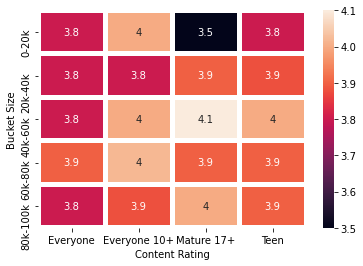

In [46]:
sn.heatmap(CRvsSB,annot=True,linewidths=4)

## ii. Greens color map 

<AxesSubplot:xlabel='Content Rating', ylabel='Bucket Size'>

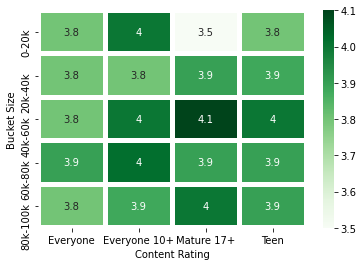

In [47]:
sn.heatmap(CRvsSB,annot=True,linewidths=4,cmap="Greens")

## d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

### My inference is that there's nothing like lighter or heavier apps are prefered but heatmap shows that apps between 40k - 60k apps have good rating as compared to other size apps.